The problems we need to solve are:

1. Plot the training data. Write a code in Python to perform nonlinear regression on the given data. Implement batch gradient descent algorithm for optimization. (Choose $\alpha = 0.01$, number of iterations = 50000)
2. Implement stochastic gradient descent for optimization of weights. Plot cost history ($J$) vs number of iterations for both cases batch gradient descent and stochastic gradient descent. Comment on the difference, if any.
3. Plot the cost history ($J$) vs number of iterations for different learning rates ($\alpha = 0.1, 0.5, 0.01, 0.05$). Write your inferences from the plot.
4. Implement line search method (Secant method) to find learning rate ($\alpha$). Optimize the weights using batch gradient descent and plot the cost history ($J$) vs number of iterations for variable learning rate. Comment on the difference between implementing line search method and choosing arbitrary $\alpha$.

Load the data and modules from the file `data1.txt` and plot the data.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from GD import BGD, SGD
import os
plt.rcParams['figure.figsize'] = (10, 6)

In [30]:
DATA_DIR = os.path.join(os.getcwd(), 'Data','prob1data.txt')
SAVE_DIR = os.path.join(os.getcwd(), 'Images')

In [31]:
DATA_DIR

'/home/kulwinder/Desktop/sem4/APL745/Assignments/Ass2/Data/prob1data.txt'

In [32]:
data = np.loadtxt(DATA_DIR, delimiter=",").T
print("The shape of data is", data.shape)

The shape of data is (70, 2)


In [33]:
x = data[:,0]
y = data[:,1]

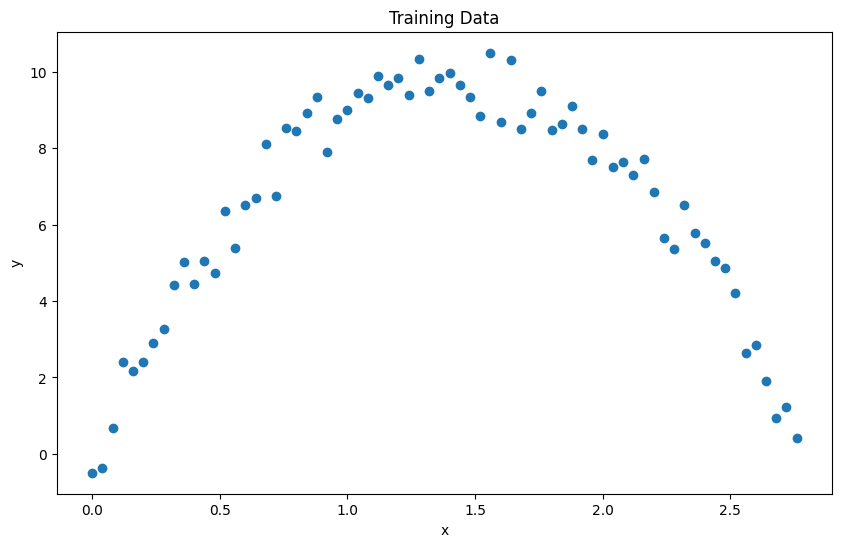

In [34]:
plt.plot(x, y, 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.savefig(os.path.join(SAVE_DIR, '0101.png'))
plt.show()


Create a new column $t^2$ 
- Here y is the height which is the output and X is 2d array with 1st column as t(time) and 2nd column as $t^2$.

In [35]:
X = np.vstack((x,x**2)).T
X.shape,y.shape

((70, 2), (70,))

## Statement 1.

Plot the training data. Write a code in Python to perform nonlinear regression on the given data. Implement batch gradient descent algorithm for optimization. (Choose $\alpha = 0.01$, number of iterations = 50000)

In [36]:
bgd = BGD(0.01, 50000)

In [37]:
bgd.fit(X, y)

The r2_score is:

In [38]:
bgd.score(X, y)

0.9684610571560146

In [39]:
y_pred_bgd = bgd.predict(X)

In [40]:
c1 = bgd.b
b1,a1= bgd.w[0], bgd.w[1]

## Statement 2.

Implement stochastic gradient descent for optimization of weights. Plot cost history ($J$) vs number of iterations for both cases batch gradient descent and stochastic gradient descent. Comment on the difference, if any.

In [41]:
sgd = SGD(0.01, 50000)
sgd.fit(X, y)

In [42]:
sgd.score(X, y)

0.9683760298459159

In [43]:
c2 = sgd.b
b2,a2= sgd.w[0], sgd.w[1]

In [44]:
y_pred_sgd = sgd.predict(X)

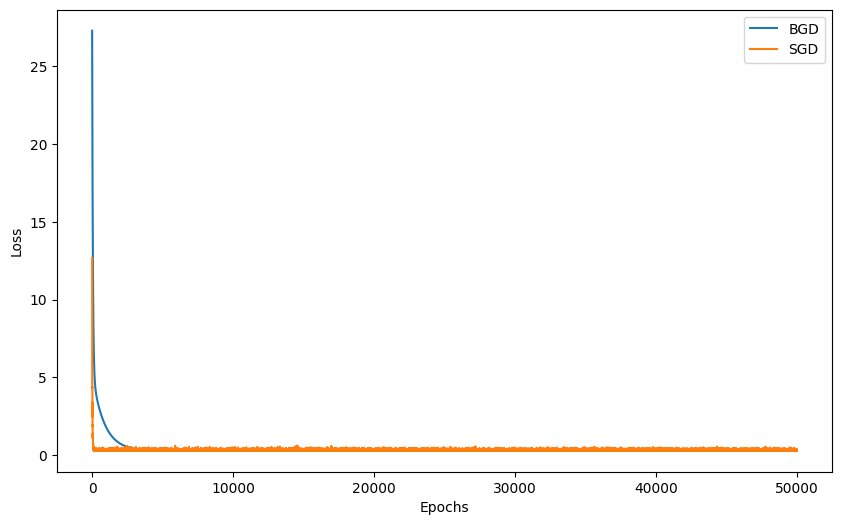

In [45]:
plt.plot(bgd.loss,label="BGD")
plt.plot(sgd.loss,label="SGD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig(os.path.join(SAVE_DIR, '0102.png'))


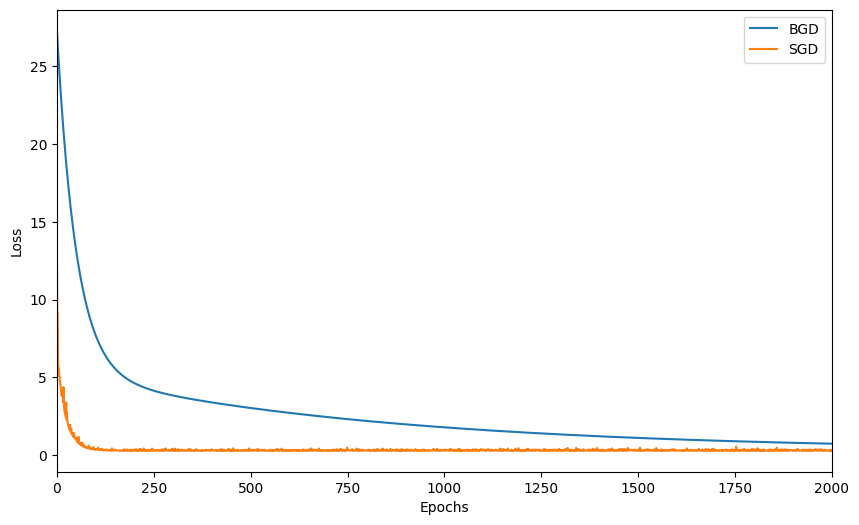

In [46]:
plt.plot(bgd.loss,label="BGD")
plt.plot(sgd.loss,label="SGD")
plt.xlim(0, 2000)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig(os.path.join(SAVE_DIR, '0103.png'))

Plot of traning data and the regression line.

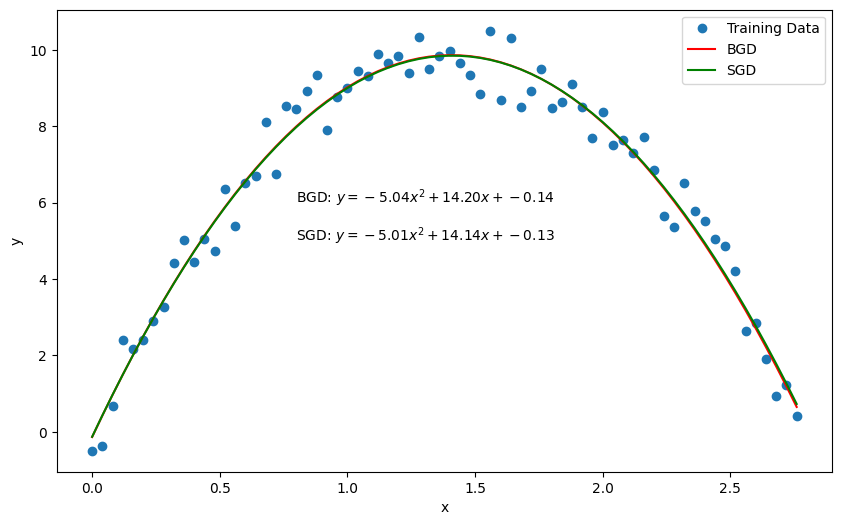

In [47]:
plt.plot(x, y, 'o',label="Training Data")
plt.plot(x,y_pred_bgd,'r',  label="BGD")
plt.plot(x,y_pred_sgd,'g',  label="SGD")
plt.annotate(f'BGD: $y = {a1:.2f}x^2 + {b1:.2f}x + {c1:.2f}$' , xy=(0.8,6), xytext=(0.8, 6))
plt.annotate(f'SGD: $y = {a2:.2f}x^2 + {b2:.2f}x + {c2:.2f}$', xy=(0.8,5), xytext=(0.8,5))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig(os.path.join(SAVE_DIR, '0104.png'))

## Statement 3.

Plot the cost history ($J$) vs number of iterations for different learning rates ($\alpha = 0.1, 0.5, 0.01, 0.05$). Write your inferences from the plot.


/home/kulwinder/.local/lib/python3.10/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/kulwinder/Desktop/sem4/APL745/Assignments/Ass2/GD.py:15: RuntimeWarning: overflow encountered in square
  return np.mean((y-y_pred)**2)
/home/kulwinder/Desktop/sem4/APL745/Assignments/Ass2/GD.py:17: RuntimeWarning: overflow encountered in multiply
  dw = -(2*np.dot(X.T,y-y_pred))/X.shape[0]


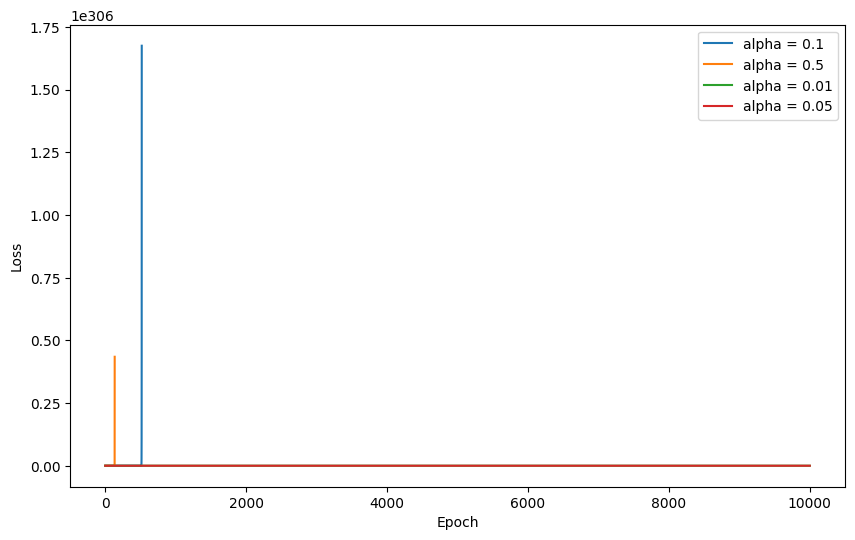

In [48]:
alpha = [0.1,0.5,0.01,0.05]
for a in alpha:
    bgd = BGD(a, 10000)
    bgd.fit(X, y)
    plt.plot(bgd.loss, label = "alpha = "+str(a))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend();
plt.savefig(os.path.join(SAVE_DIR, '0105.png'))


Since the learning rate is too high in case of 0.1,0.5. So, the cost function is not converging and we can't get the minimum of loss function. In case of 0.01,0.05, the cost function is converging.

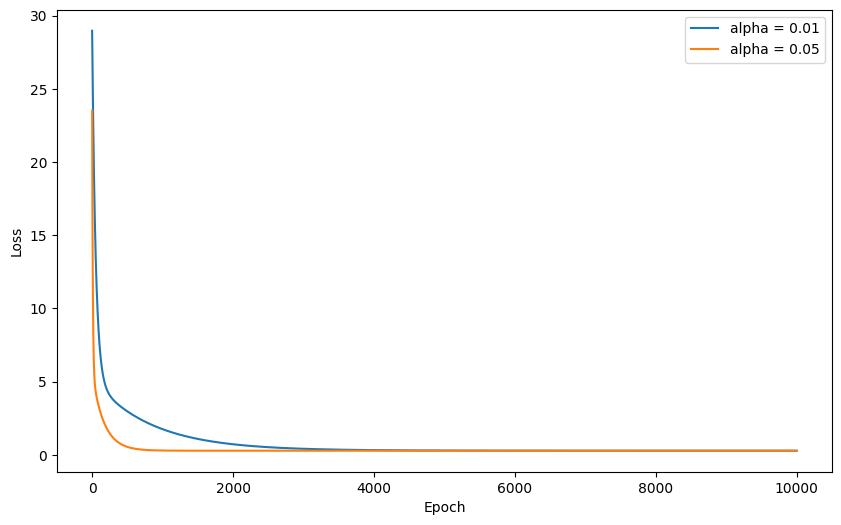

In [49]:
alpha = [0.01,0.05]
for a in alpha:
    bgd = BGD(a, 10000)
    bgd.fit(X, y)
    plt.plot(bgd.loss, label = "alpha = "+str(a))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend();
plt.savefig(os.path.join(SAVE_DIR, '0106.png'))

## Statement 4.

Implement line search method (Secant method) to find learning rate ($\alpha$). Optimize the weights using batch gradient descent and plot the cost history ($J$) vs number of iterations for variable learning rate. Comment on the difference between implementing line search method and choosing arbitrary $\alpha$.

In [50]:
fit_intercept = True

In [51]:
def _delJdelW(y_hat, y_true, X):
    m = len(y_hat)
    res = np.matmul((y_hat - y_true), X)
    return res / m

def _get_weights(n):
    w = np.random.random((n))
    return w

def predict(X, w):
    return np.dot(X, w.T)

def _get_loss(y_hat, y_true):
    m = len(y_hat)

    return np.sum((y_hat - y_true) ** 2) / (2 * m)

def _preprocess(X):
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    if fit_intercept:
        ones = np.ones((X.shape[0], 1))
        X = np.append(ones, X, axis=1)
    return X


In [52]:
def phi(alpha, weights, X, y):
    """
    Calculates the phi as a function of alpha
    phi(alpha) = J(w - alpha * delw)
    """
    y_hat = predict(X, weights)
    delf = _delJdelW(y_hat, y, X)
    w_new = weights - alpha * delf
    y_hat_new = predict(X, w_new)
    return _get_loss(y_hat_new, y)

def dphi(alpha, weights, X, y):
    """
    Calculates the derivative of the phi function. Needed for the secant method
    """
    eps = 1e-5
    phi_plus = phi(alpha + eps, weights, X, y)
    phi_minus = phi(alpha - eps, weights, X, y)
    return (phi_plus - phi_minus) / (2 * eps)

def secant(f, x0, x1, tol=1e-5, max_iter=1000, **kwargs):
    """
    Determines the minimum of a function using the secant method
    """
    x = x0
    x_prev = x1
    for i in range(max_iter):
        x_new = x - f(x, **kwargs) * (x - x_prev) / (
            f(x, **kwargs) - f(x_prev, **kwargs) + 1e-10
        )
        if abs(x_new - x) < tol:
            return x_new
        x_prev = x
        x = x_new
    return x_new

def _get_lr(X, y, weights):
 
    raw_lr = secant(
        phi, 0.1, 0.01, weights=weights, X=X, y=y, tol=1e-5, max_iter=1000
    )

    if raw_lr < 1e-3:
        raw_lr = 1e-3
    elif raw_lr > 0.7:
        raw_lr = 0.7
    return raw_lr


In [53]:
def score(X, y, W):
    y_pred = predict(X, W)
    r2_n = np.sum((y-y_pred)**2)
    r2_d = np.sum((y-y.mean())**2)
    return 1 - (r2_n/r2_d)

In [54]:
EPOCH = 2000
losses = []
weights = _get_weights(X.shape[1]+1)
X_p = _preprocess(X)
y_hat = predict(X_p, weights)
loss_prev = _get_loss(y_hat, y)
for i in range(EPOCH):
    print(f"Epoch {i+1}/{EPOCH}", end="\r")
    y_hat = predict(X_p, weights)
    delf = _delJdelW(y_hat, y, X_p)
    lr = _get_lr(X_p, y, weights)
    weights -= lr * delf
    loss = _get_loss(y_hat, y)
    losses.append(loss)
    loss_prev = loss

In [56]:
r2 = score(X_p, y, weights)
print(f"R2: {r2:.2f}")

R2: 0.97


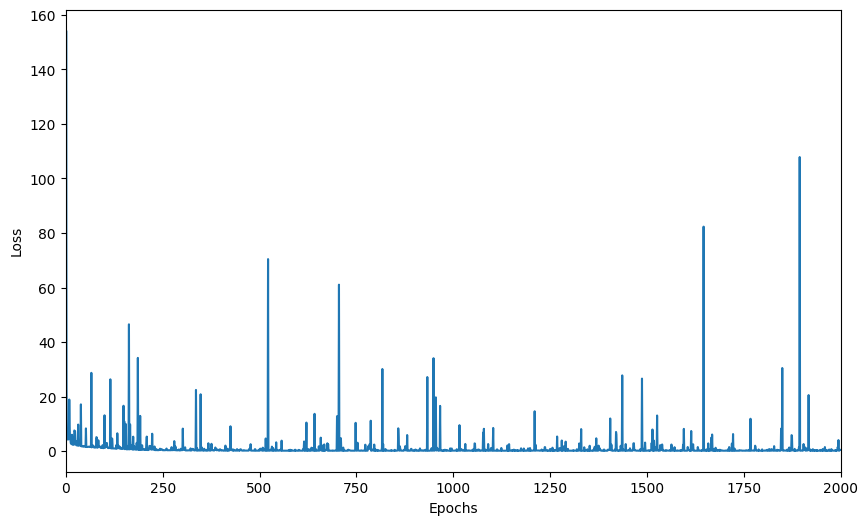

In [58]:
plt.plot(losses)
plt.xlim(0, 2000)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig(os.path.join(SAVE_DIR, '0107.png'))